`Seaborn` offers powerful figure-level functions that create grids of plots to visualize relationships across different subsets of your data or between multiple variables simultaneously. The main functions here are `pairplot()`, `jointplot()`, and the underlying `FacetGrid` object.

## Seaborn: Multi-plot Grids (pairplot, jointplot, FacetGrid)


This document covers `Seaborn`'s powerful multi-plot grid capabilities:

* **`sns.pairplot`:** Creates a matrix of axes showing pairwise relationships between variables in a `DataFrame`, excellent for initial exploration.
* **`sns.jointplot`:** Focuses on a single bivariate relationship but enhances it by adding marginal plots showing the univariate distribution of each variable.
* **`sns.FacetGrid`:** Provides a general framework for creating grids of plots where the rows, columns, and potentially colors (`hue`) represent different subsets of your data. You initialize the grid structure and then "map" axes-level plotting functions onto it. This is the engine behind figure-level functions like `relplot`, `displot`, and `catplot`.

---

These tools are invaluable for comparing distributions and relationships across different conditions or groups within your data.

In [1]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load example datasets
iris = sns.load_dataset("iris")
penguins = sns.load_dataset("penguins").dropna() # Drop NaNs for simplicity

# --- Basic Inspection ---
print("--- 'iris' Dataset Head ---")
print(iris.head())
print("\n--- 'penguins' Dataset Head ---")
print(penguins.head())
print("-" * 30)

# Set a consistent theme
sns.set_theme(style="ticks")

--- 'iris' Dataset Head ---
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

--- 'penguins' Dataset Head ---
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       34

#### 1. Pair Plot (sns.pairplot)
- Creates a grid showing pairwise relationships between numerical columns.
- Diagonal shows univariate distributions (hist or kde).
- Figure-level function.

--- 1. Pair Plot (pairplot) ---


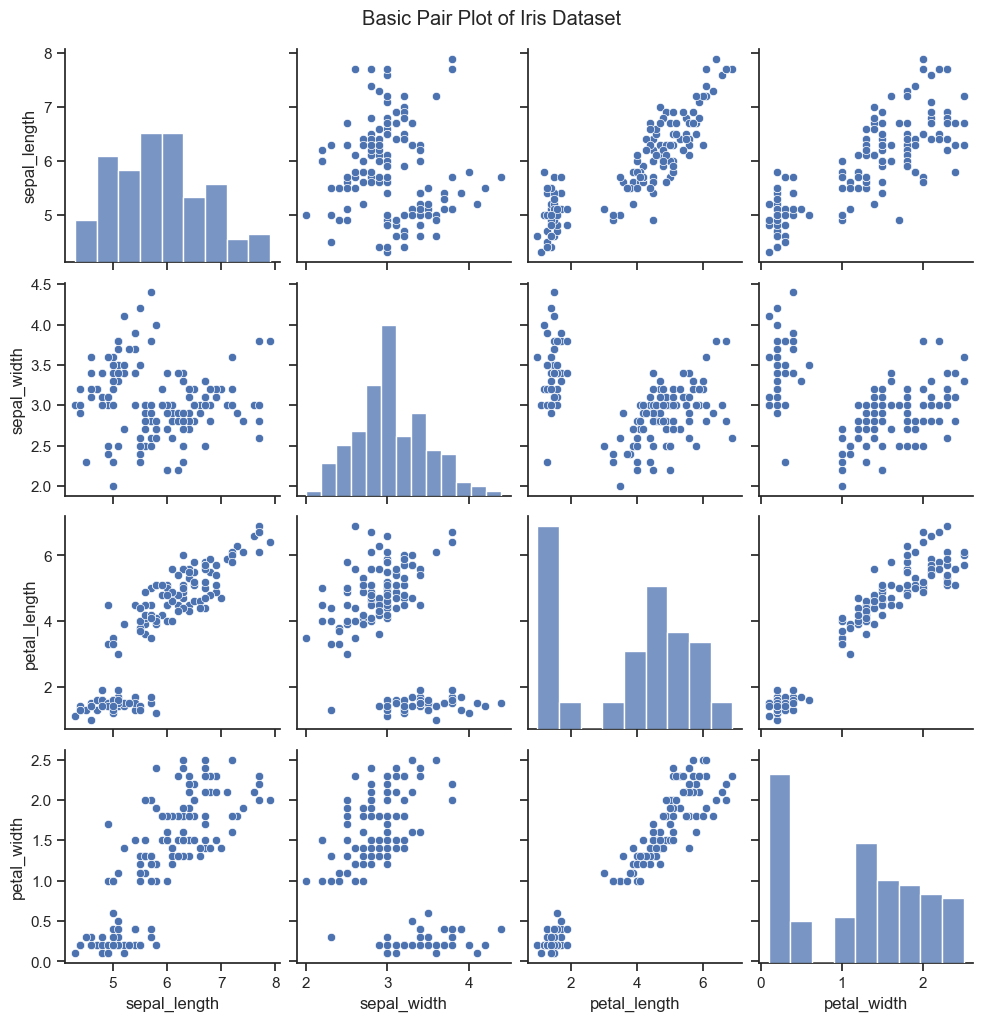

Generated basic pair plot.


In [3]:
print("--- 1. Pair Plot (pairplot) ---")

# a) Basic pair plot for the iris dataset
# Plots scatter plots for pairs of variables and histograms on the diagonal
pairplot_basic = sns.pairplot(iris)
pairplot_basic.fig.suptitle('Basic Pair Plot of Iris Dataset', y=1.02) # Add title
plt.show()
print("Generated basic pair plot.")

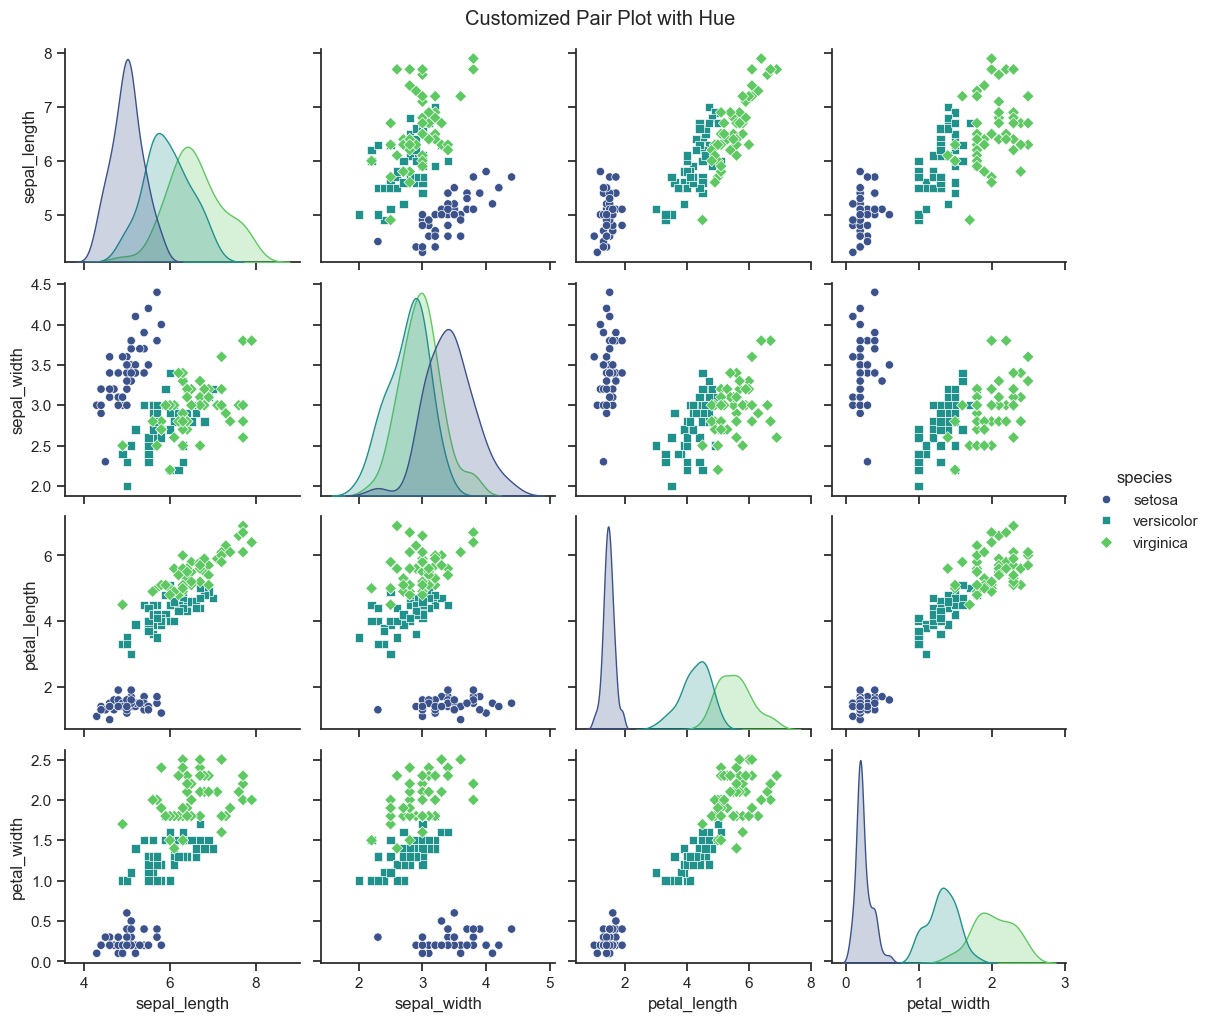

Generated customized pair plot with hue.


In [4]:
# b) Pair plot with hue mapping and different diagonal/off-diagonal kinds
pairplot_custom = sns.pairplot(
    iris,
    hue="species",          # Color points by species
    kind="scatter",         # Kind of plot for off-diagonal ('scatter', 'kde', 'hist', 'reg')
    diag_kind="kde",        # Kind of plot for diagonal ('hist', 'kde', 'auto')
    markers=["o", "s", "D"],# Different markers for hue levels
    palette="viridis",      # Color palette
    height=2.5,             # Height of each facet
    aspect=1.1              # Aspect ratio of each facet
)
pairplot_custom.fig.suptitle('Customized Pair Plot with Hue', y=1.02)
plt.show()
print("Generated customized pair plot with hue.")

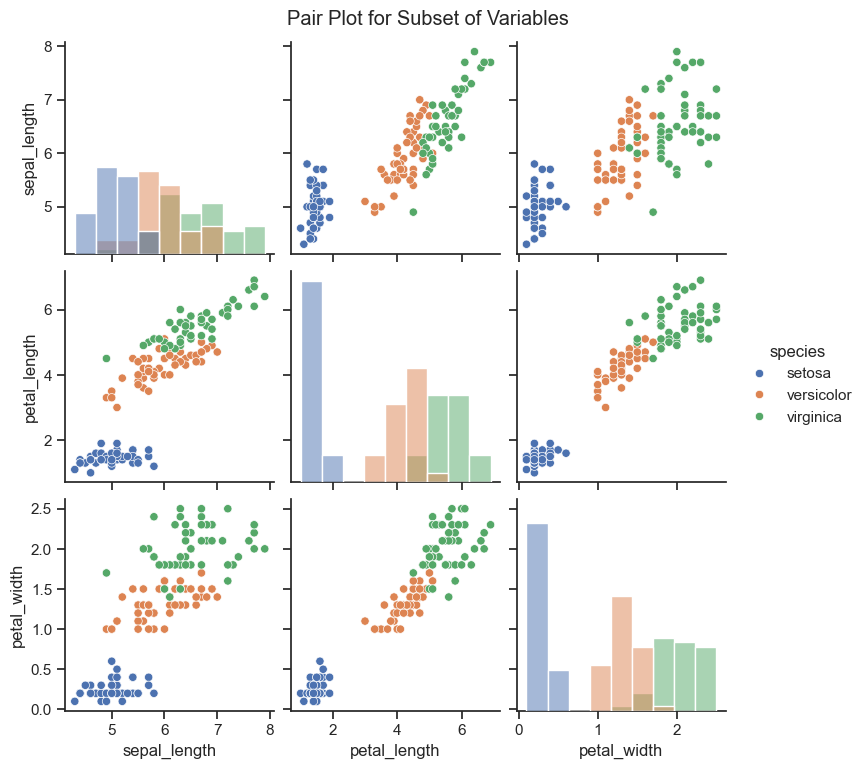

Generated pair plot for a subset of variables.
------------------------------


In [5]:
# c) Plotting only a subset of variables
pairplot_subset = sns.pairplot(
    iris,
    vars=["sepal_length", "petal_length", "petal_width"], # Only plot these variables
    hue="species",
    diag_kind="hist"
)
pairplot_subset.fig.suptitle('Pair Plot for Subset of Variables', y=1.02)
plt.show()
print("Generated pair plot for a subset of variables.")
print("-" * 30)

#### 2. Joint Plot (sns.jointplot)
- Focuses on a single bivariate relationship but adds marginal univariate plots.
- Figure-level function.

--- 2. Joint Plot (jointplot) ---


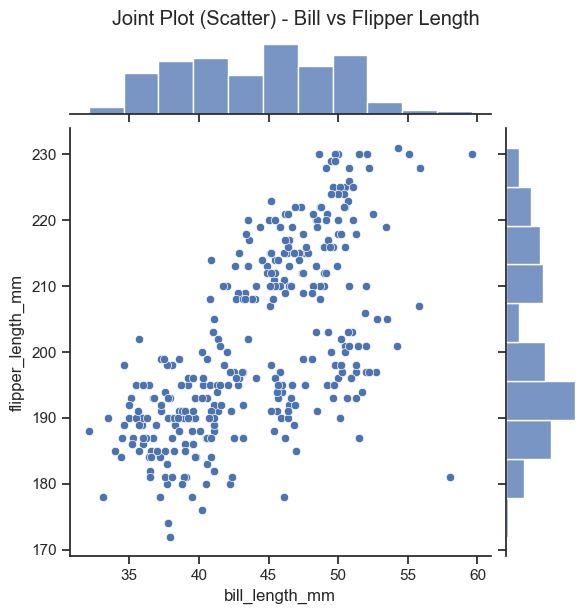

Generated basic joint plot (scatter).


In [6]:
print("--- 2. Joint Plot (jointplot) ---")

# a) Basic joint plot (scatter with marginal histograms - default)
jointplot_scatter = sns.jointplot(data=penguins, x="bill_length_mm", y="flipper_length_mm")
jointplot_scatter.fig.suptitle('Joint Plot (Scatter) - Bill vs Flipper Length', y=1.02)
plt.show()
print("Generated basic joint plot (scatter).")

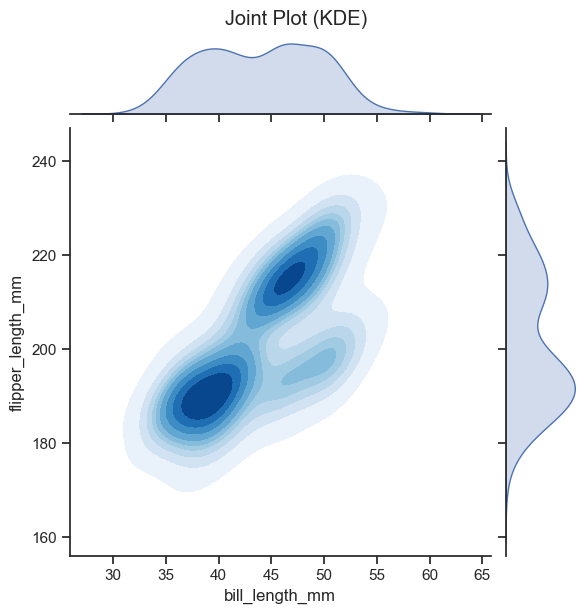

Generated joint plot with KDE.


In [7]:
# b) Joint plot with KDE
jointplot_kde = sns.jointplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", kind="kde", fill=True, cmap="Blues")
# kind can be 'scatter', 'kde', 'hist', 'reg', 'resid'
jointplot_kde.fig.suptitle('Joint Plot (KDE)', y=1.02)
plt.show()
print("Generated joint plot with KDE.")

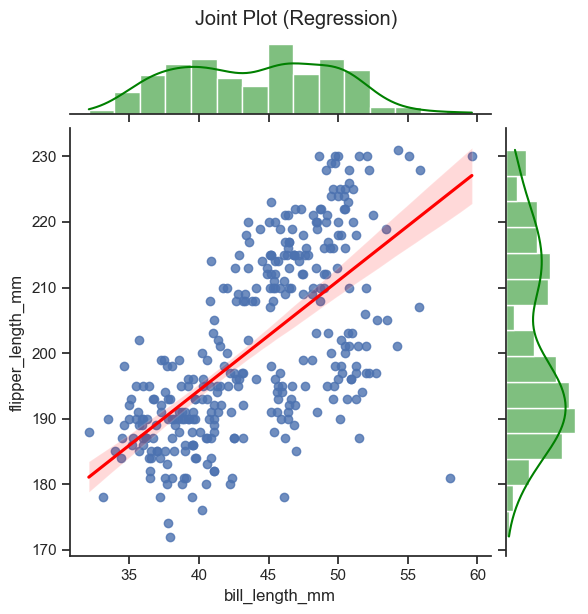

Generated joint plot with regression.


In [8]:
# c) Joint plot with regression line
jointplot_reg = sns.jointplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", kind="reg",
                              joint_kws={'line_kws':{'color':'red'}}, # Customize regression line
                              marginal_kws={'bins':15, 'color':'green'}) # Customize marginal histograms
jointplot_reg.fig.suptitle('Joint Plot (Regression)', y=1.02)
plt.show()
print("Generated joint plot with regression.")

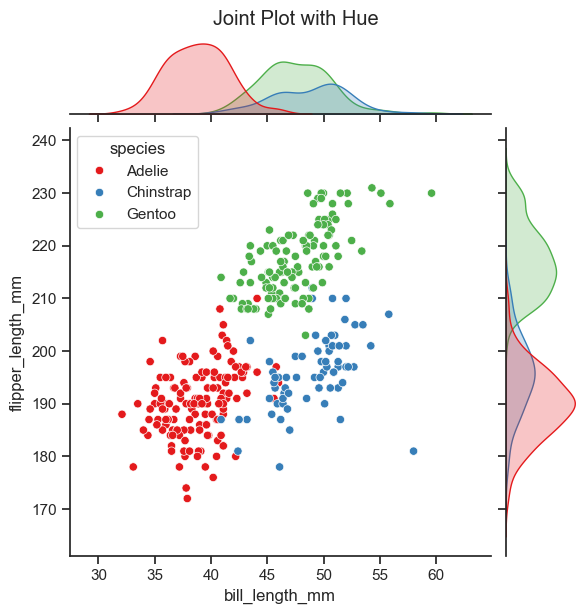

Generated joint plot with hue.
------------------------------


In [9]:
# d) Joint plot with hue mapping
# Note: Hue is applied to both joint and marginal plots where appropriate
jointplot_hue = sns.jointplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", hue="species",
                              kind="scatter", # Kind must support hue directly for joint plot
                              palette="Set1")
jointplot_hue.fig.suptitle('Joint Plot with Hue', y=1.02)
plt.show()
print("Generated joint plot with hue.")
print("-" * 30)

#### 3. Facet Grid (sns.FacetGrid)
- The underlying object for figure-level functions like relplot, displot, catplot.
- Allows creating custom grids based on dataset variables and mapping plotting functions onto the grid.

--- 3. Facet Grid (FacetGrid) ---


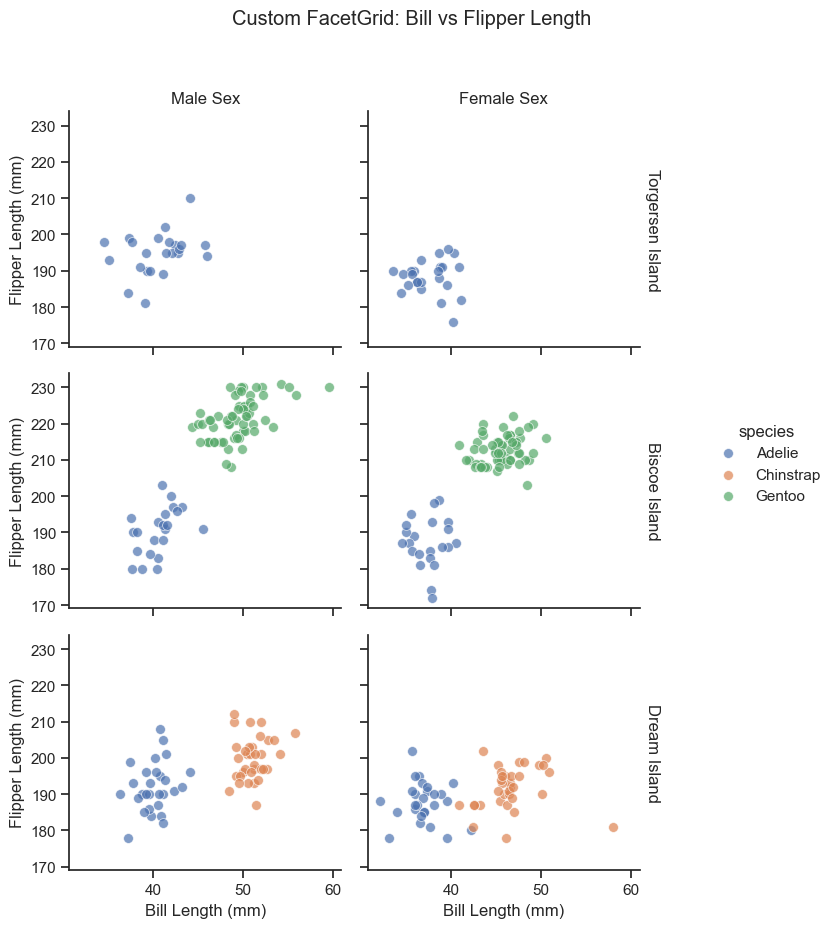

Generated custom plot using FacetGrid.


In [18]:
print("--- 3. Facet Grid (FacetGrid) ---")

# a) Initialize the grid structure
# Define rows, columns, and hue based on categorical variables
facet_grid = sns.FacetGrid(penguins,
                           col="sex",      # Columns based on sex
                           row="island",   # Rows based on island
                           hue="species",  # Color points by species
                           height=3, aspect=1.2,
                           margin_titles=True) # Move titles to margins

# b) Map a plotting function onto the grid
# Use an axes-level function like scatterplot, histplot, etc.
facet_grid.map(sns.scatterplot, "bill_length_mm", "flipper_length_mm", alpha=0.7, s=50) # Map scatterplot

# c) Add customization
facet_grid.add_legend() # Add a legend for the hue variable
facet_grid.set_axis_labels("Bill Length (mm)", "Flipper Length (mm)") # Set overall axis labels
facet_grid.set_titles(col_template="{col_name} Sex", row_template="{row_name} Island") # Customize subplot titles
facet_grid.fig.suptitle('Custom FacetGrid: Bill vs Flipper Length', y=1.03) # Add overall title
facet_grid.tight_layout() # Adjust layout

plt.show()
print("Generated custom plot using FacetGrid.")

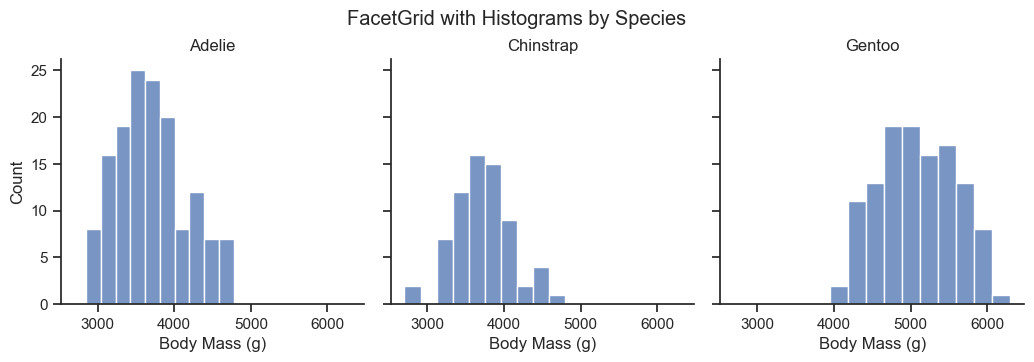

Generated FacetGrid with histograms.
------------------------------


In [19]:
# Another FacetGrid example: mapping histograms
facet_hist = sns.FacetGrid(penguins, col="species", height=3.5)
facet_hist.map(sns.histplot, "body_mass_g", bins=10, kde=False) # Map histplot
facet_hist.set_titles(col_template="{col_name}")
facet_hist.set_axis_labels("Body Mass (g)", "Count")
facet_hist.fig.suptitle('FacetGrid with Histograms by Species', y=1.03)
plt.show()
print("Generated FacetGrid with histograms.")
print("-" * 30)